In [13]:
# Thanks Yvi :)

## Import of dependencies

In [14]:
# display full output in Notebook, instead of only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# customized preprocessing functions
import util

# standard libraries
import pandas as pd
import numpy as np
import os
from datetime import datetime
import time
import matplotlib.pyplot as plt

#viz
import seaborn as sns
# plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

#store model
import pickle

## Import data

In [16]:
locations = ['burgdorf', 'rapperswil']

In [18]:
data_path = "/Users/christopherkindl/working/start-hack-2021/00_data" # sorry but I ran into a strange directory error

dfs = {}

for loc in locations:
    dfs[loc] = pd.read_csv(os.path.join(data_path, "features_{}.csv".format(loc)), sep=",")
    dfs[loc]['date'] = pd.to_datetime(dfs[loc]['date'])

    #  declare categorical columns
    for col in ['hour', 'day_of_week', 'quarter', 'month', 'day_of_year', 'day_of_month',
                'week_of_year', 'weather', 'weather_t-1', 'weather_t-2', 'weather_t-3', 'weather_t-7', 
                'holiday']:
        
        dfs[loc][col] = dfs[loc][col].astype(object)

    # set datetime column as index
    dfs[loc].set_index('date', inplace = True)

In [19]:
for loc in locations:
    print('Dataset shape of {} data: {}'.format(loc.capitalize(), dfs[loc].shape))

Dataset shape of Burgdorf data: (7768, 29)
Dataset shape of Rapperswil data: (12303, 29)


## Boxplots

Text(0.5, 0, 'Hour of day')

Text(0, 0.5, 'Parking occupancy (%)')

Text(0.5, 0, 'Hour of day')

Text(0, 0.5, 'Parking occupancy (%)')

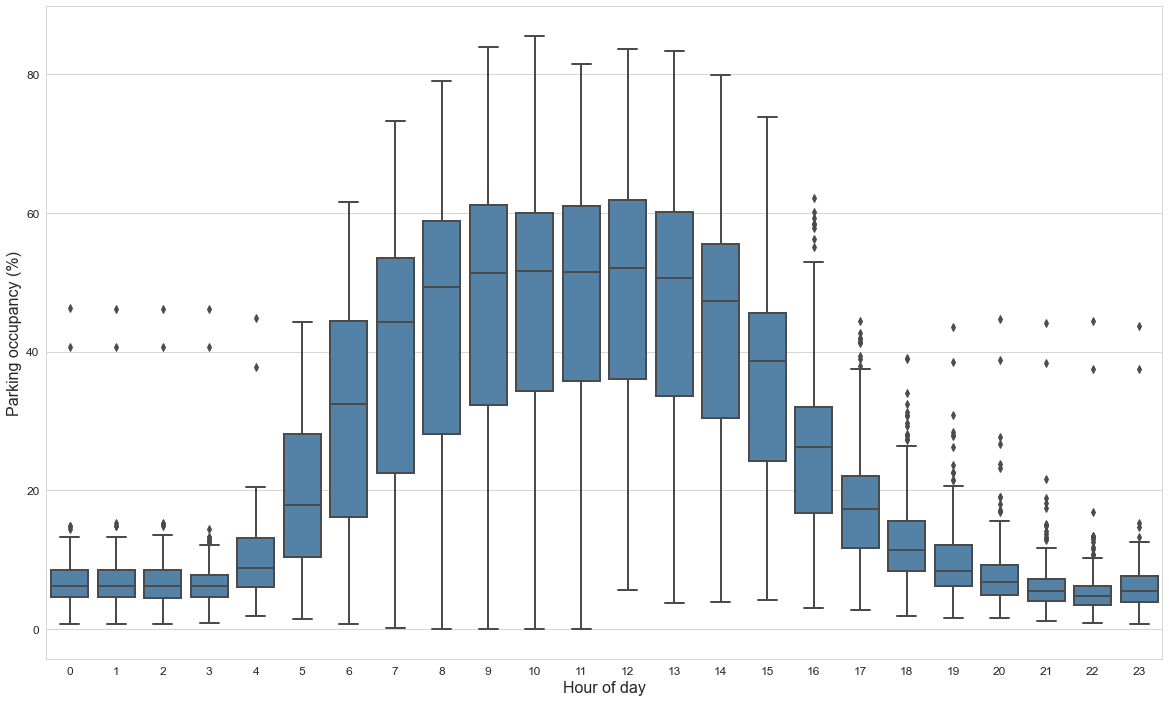

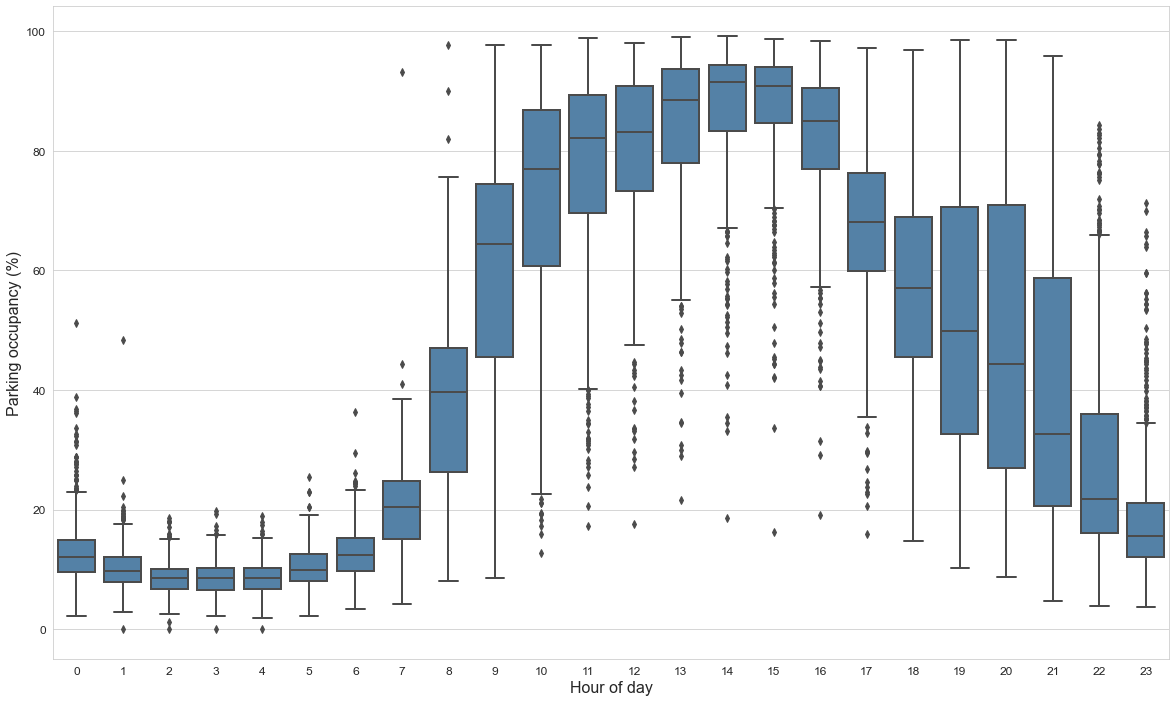

In [20]:
for loc in locations:
    # set size of figure
    fig = plt.figure(figsize=(20,12));

    # provide data
    # please align colors with current colors in paper
    ax = sns.boxplot(x='hour', y='occupancy_rate', data=dfs[loc], linewidth=2, color="steelblue");

    # please align style, especially fontsizes
    plt.xlabel('Hour of day', fontsize = 16);
    plt.ylabel('Parking occupancy (%)', fontsize = 16);
    #ax = sns.boxplot(x=df.groupby('hour')['occupancy_rate'].mean().index, y=df.groupby('hour')['occupancy_rate'].mean())
    #plt.show();

    # save fig
    path = '/.'
    os.chdir(path)
    file = 'boxplot_' + loc + '.png'
    plt.savefig('/Users/christopherkindl/working/start-hack-2021/05_visualisations_of_eda/' + file,
               facecolor=fig.get_facecolor(), edgecolor='none');